<cite data-cite="9112711/NTEXEY3I"></cite># Title

 ### Contributor1FirstName  Contributor1LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID) 
Institution

### Contributor2FirstName  Contributor2LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

### Contributor3FirstName  Contributor3LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


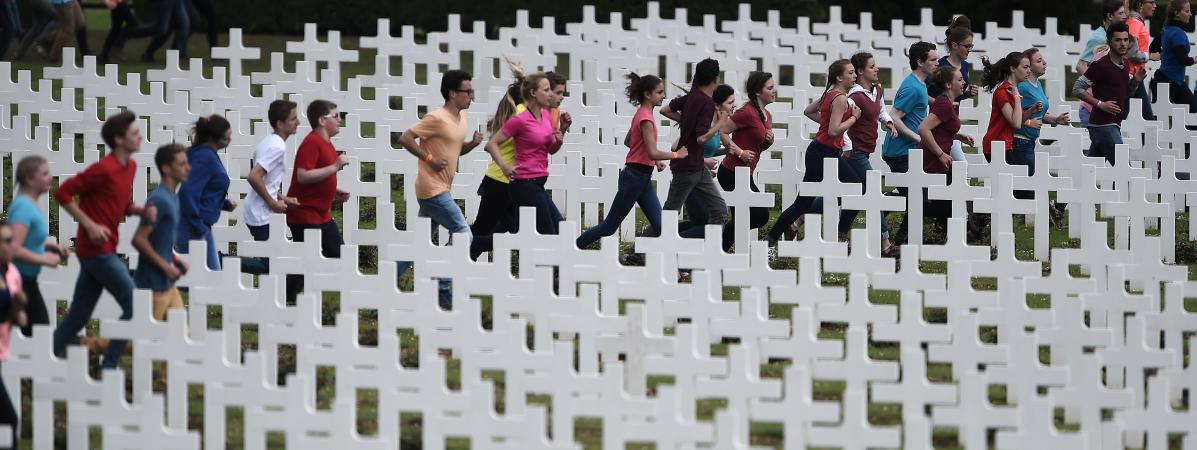

In [4]:
from IPython.display import Image, display

display(Image("./media/CentenaireVerdun.jpg"))

 (optional) This article was orginally published (...)

FirstKeyword, SecondKeyword, AlwaysSeparatedByAComma

This is an abstract (...)

TO DO : 
- Mieux organiser les librairies et ajouter un descriptif pour chacune d'entre elles
- migration des données
- Discuter de la partie SOM (je n'arrive pas à charger le modèle sauvegardé)
- Rajouter les Caption pour les figures plotly
- Pour les Tableaux Markdown : il faut directement ajouter le titre de la table dans le metadata de la cellule jupyter
- Pour la partie Topic Modelling : on utilise bien les nouveaux topics qu'on avait trouvé pour le précédent articles ? ce sont eux que j'ai ajouté, comme on avait sauvegardé le modèle on peut les recharger. De toute façon on avait aussi saauvegardé la table des topics et la tables du poids des topics dans chaque documents

## Introduction

### Aim of this paper

In the field of digital humanities, the great concern is to build an accurate, reliable and useful digital representation of analogical material. For that
reason, methodological papers focus on the main steps of that process : digitalization, layout detection, character recognition, spelling correction, names
recognition, text encoding, design of ontologies. Natural Language Processing and Automatic Classification can be of some use, for instance when it
comes to detecting errors – actually, NLP techniques are built-in parts of
modern OCR algorithms. However, they are mostly seen as tools, and thus
their efficiency is assessed in a pretty straightforward way : how accurate is
the result they provide with regard to the initial material.  

When it comes to research in Data Science though, things can get quite
tricky. There is hardly a unified framework to answer questions such as : is
topic modeling giving me good insights about the evolution of the concerns
my corpus deals with over time ? What is a relevant division of my corpus
according to time periods, geographical zones, political lines ? More generally,
it might be quite difficult to be sure that the insights we get from exploratory
analysis are not misleading, especially when we are dealing with amounts of
data that make direct verifications virtually impossible.

In this paper, we aim to address several kinds of problems that historians
have to consider when dealing with large amounts of digital data :
- how can we select relevant data throuh huge amounts of materials ?
- what kind of visualization might give the best insights about the dispersion of the data ?
- how is it possible to come with meaningful variables and to classify the data to a high degree of certainty ?
- what is a relevant method to display evolutions throughout time ?

<div class="cite2c-biblio"></div>

### Previous works and perspectives

### Outline

This article is divided into four sections, each one about one category of
methods. In the first section, we deal with supervised classification, and how
to use it identify relevant information in a huge corpus. In the second section,
we start tackling the high dimension through the angle of visualization : how
to represent information in a way which is meaningful and as little misleading
as it is possible – both for exploration and explanation purposes. In the
third section, we investigate some methods which are specific to NLP and
help building accurate variables beyond the simple frequencies. Finally, the
fourth section is devoted to the analysis of the time component in different
kind of corpora.

### Data

Though this paper is mostly a methodology paper, we will focus on one
single source, namely the parliamentary reports form french Third Republic,
with the hope of showing some insights about the corpus that researches in
political history might find interesting per se. From 1881 to 1940 and the
fall of the Republic, the debates in the lower chamber of french Parliament
have been recorded and published in the Journal Officiel. In the early 2010s,
the archivists from the french national library (BNF) have digitalized these
texts, stored them in a freely accessible database on Gallica[REF], together
with some precious metadata, and finally performed automatic transcription
(OCR) on them. They have made available online these texts in XML format[REF] ; hereafter we will refer to this corpus as OCR-12. However, these
transcriptions were not manually proofread, and, due to the early technology
that was used back then, were not absolutely accurate (see figure 1). Thanks
to grants from BNF-Datalab and INRIA, a team of researchers (INRIA-Almanach, LARHA and Epitech MNSHS) have been able to come up with
a new version of the transcription with greater accuracy, though only for
the period 1890-1900. Most of the examples in this article are taken from
that recent transcription, which we call OCR-21, while for some long-term
analysis we will have to use OCR-12.


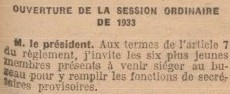

In [14]:
from IPython.display import Image, display
metadata_1={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "figure X: Original (digitalized) text",
          ]
        }
    }
}
display(Image(r"latex+images+python\img\jo33.jpg",width = 800, height = 800), metadata=metadata_1)

| OCR-12 version | OCR-21 version
|---|---|
|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 5U règlement, j’invite les six plus jeunes Sfâinbres présents à venir siéger au buu pour y remplir les fonctions do secrér "V.l !lles provisoires.|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 du règlement, j’invite les six plus jeunes membres présents à venir siéger au bureau pour y remplir les fonctions de secrétaires provisoires.|



##  Building the Data

In this section we will address the question of identifying texts that a relevant for a given purpose

### Supervised classification

Let us assume we dispose of a huge corpus, and we want to find out all
the documents that deal with a certain issue, for instance the role of the
Church within the State. We cannot extensively go through all documents
and decide one after the other. In addition, we cannot just identify a few
keywords, for deciding in advance which ones are necessary would probably
lead to a lot of mistakes and misses. One solution is to train an algorithm
on a sample and then apply it to the rest of the corpus.  
Formally, we consider a problem of supervised classification. We have
two classes, say 0,1 : 1 stands for the documents that are relevant to our
purpose while 0 stands for those who are not. We divide at random the data
set into three parts, (let us say for the sake of example, that they stand for
respectively 6%, 4% and 90% of the corpus) that we call the training set, the
validation test and the test set. The analysis now consists of the following
steps :
1.  Manually label all the texts in the training and validation sets, so
that we know for sure which ones are relevant to the topic and which
ones are not.
2.  Train various algorithms and parameters on the train set and monitor their performance on the validation test.
3.  Once the performance indicators are accurate enough, use the trained
algorithm to find out which texts in the test set belong to the expected
class.

### Assessing the quality of a classification

The ability of an algorithm to correctly predict which text belongs to a
given class among the large test set – which we cannot directly assess, for
it is too big – can be inferred from its ability to predict on the validation
set. Note that this induction only works if the sets are parted randomly :
otherwise, the indicators might be biased. This being said, let us consider
the indicators we dispose of for that assessment.  
First and most straightforward indicator is called accuracy : how many
times does the algorithm succeed at predicting the accurate value of the class.
A score of 50% means the algorithm is not better than pure randomness and
thus can be discarded, while a 100% is a perfect prediction. However an
accuracy at 90% means nothing per se. Indeed, consider the class of all the
texts dealing with Church problems among the parliamentary reports.
These texts represent only 182 among 7473, that means 2.44%. Thus it is possible to
achieve 97.56% accuracy by predicting that no text at all is about the Church.
Thus we will rather rely on two slightly more sophisticated measures : the
Confusion Matrix and the Receiver Operating Characteristic (see Figure 3).
The confusion matrix simply plots the predicted classes against the real ones,
allowing one to simultaneously check the ability of the algorithm to assess all
classes. On the other hand, the ROC curve plots the true positive rate against
the false positive rate as the algorithm builds predictions by decreasing order
of certainty. It can be used both for ranking algorithms (the further a curve
is from the diagonal line the better) and for deciding until which portion
of the sample the algorithm can be trusted (at some point the ratio of true
positive vs false positive becomes too close to a randomness)

| X | Y
|---|---|
|A ceux qui ne veulent pas abroger le Concordat et la loi de l'an X,je dis : Sur ce point, vous devez être avec nous ; il doit y avoir unanimité dans cette Chambre parmi les républicains pour séculariser<br> les biens des congrégations religieuses. (...)|1|
|En effet, un traité a été conclu avec la république Sud-Africaine,celui qu'invoquait au début de la séance M. le ministre des affairesétrangères comme nous liant, par suite de la clause de la nation laplus favorisée, avec les autres pays<br>européens. (...)|0|

| word | score |
|---|---
|mot1|17.5|
|mot2|12.3|
|mot3|-8.6|
|mot4|7.6|
|mot5|-3.9|
|mot6|3.3|

## The dimension problem, part 1 : Visualization

In many social sciences, we are used to dealing with tabular data. Any
data unit can be seen as a vector in some multi-dimensional space. For instance, our corpus can be described as a table of pages, with some meta-data
information, and for every word of the vocabulary the number of occurences
within the page ([Table X](#table-X)). When it comes to this kind of representation, the
dimension of the space can be huge, tens of thousands of columns. Hence it
is difficult to provide a 2-D visualisation of that data, for instance for the
purpose of understanding which pages have similar content, deal with the
same topics, or might have been written in close context.

|page|date|"président"|"terme"|"article"|"règlement"|...|
|---|---|---|---|---|---|---|
6829|1933-01-10|24|1|5|3|...|

In [43]:
# basic libraries
import os
from typing import Tuple, List, Dict, Any, TextIO
import pandas as pd
import numpy as np
import re

# graphics
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt, cm
import plotly.io as pio
import plotly.graph_objects as go

from datetime import datetime, date
from matplotlib import dates as mdates

# NLP packages
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist, NaiveBayesClassifier

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# machine learning models
from sklearn.cluster import AgglomerativeClustering, KMeans # clustering algorithms
from sklearn.decomposition import PCA, LatentDirichletAllocation # topic modelling
from sklearn.preprocessing import MinMaxScaler # scaling data
from sklearn.feature_extraction.text import CountVectorizer # counting word frequencies
from scipy.cluster.hierarchy import dendrogram # plotting dendogram

import pickle  # saving and downloading IA models

import warnings
warnings.filterwarnings('ignore') # remove warnings

path_to_data = r"C:\Users\Aurelien Pellet\Desktop\Aurelien\epitech\methodo_histoire_nlp"
path_to_media = r"C:\Users\Aurelien Pellet\Desktop\Aurelien\epitech\jdh_articlemethodo\media"
path_to_big_data = r"C:\Users\Aurelien Pellet\Desktop\Aurelien\epitech\methodo_histoire_nlp_data"

In [16]:
def moving_average(data: List[float], periode: int):
    return np.convolve(np.array(data), np.ones(periode), 'valid') / periode

def ngram(forms: List[str]):
    fig = plt.figure(figsize=(15, 10))
    comptage: Dict[str, List[int]] = {word: list() for word in forms}
    dates: List[date] = list()
    for session_file_adr in os.listdir(os.path.join(path_to_data, "comptage_lemmes")):
        dates.append(datetime.strptime(re.split("\.|_",session_file_adr)[0], '%Y-%m-%d').date())
        session_compteur = pd.read_csv(os.path.join(path_to_data, "comptage_lemmes", session_file_adr),
                                       sep=";", encoding="utf-8").set_index("Unnamed: 0")
        taille: int = session_compteur.sum()
        for word in forms:
            comptage[word].append(session_compteur.loc[word].values[0] / taille.values[0] if word in session_compteur.index else 0)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
    for word in forms:
        plt.plot(dates[18:-18], moving_average(comptage[word], 37), label=word)
    plt.legend()
    plt.gcf().autofmt_xdate()
    #plt.savefig(r"media\frequences.png")
    plt.close()
    caption_content = "Figure X: évolution de la fréquences des mots à travers les années"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

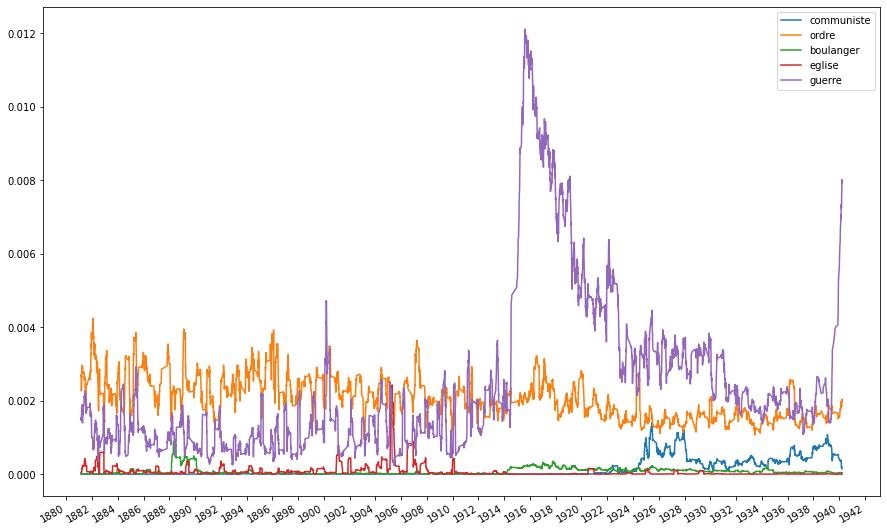

In [17]:
ngram(["communiste", "ordre", "boulanger", "eglise", "guerre"])

### Limits of PCA

Among the most popular tools is the Principal Component Analysis
(PCA). Basically the PCA performs a rotation inside the data space, in
such a ways that i-th axis has maximal variance among the subspace where
axis 1 to i − 1 have been removed. This might come in handy when the first
axes are able to capture a significant part of the overall variance, as it is often
the case with small-dimension or highly-correlated data. However, when it
comes to textometry, such conditions are not met so frequently, and thus the
tool can be misleading.

[Figure X](#figure-X) is an example of such a confusion. Here we are displaying the
results of a PCA trained on the documents issued in 1882 – their names
are encoded in the format **MONTH-DAY** (+_num in case of several documents in a single day), based on the frequency of words in each text.
We can ignore the colors for the moment and focus on the proximity of
some nodes. Formally, the distance between two documents is equal to the
sum of the squares of differences in frequencies over all the vocabulary $D(a,b) = \sum_{w \in \mathcal{V}} (f_w(a)-f_w(b))^2$
.  
Although they look very close in the PCA
the documents 02-23 and 02-13 are actually quite distant as we can see from
[Table X](#table-X). Symmetrically, the documents 02-23 and 05-11 are shown at long
distance from each other in the PCA while they are actually closer neighbors
than the previous pair.

These false impressions could be corrected by looking at the other axes
from the PCA – here the third one mostly, but watching simultaneously
several graphs and pondering them with the contribution of every axis does
not make the PCA a very practical tool for understanding proximities on a
global scale. Therefore, we want to emphasize the importance of two methods
that may be good replacements or complements to PCA, namely : non-linear
transforms and automatic clustering.

In [3]:
matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                             encoding="utf-8", header=0).set_index("Unnamed: 0")
matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
matx_occurrences = matx_occurrences.transpose().applymap(lambda x : int(x))


caption_content = "table X: extract of the frequency matrix for the year 1882"
display(matx_occurrences.iloc[:5,:5].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

Unnamed: 0,loi,chambre,commission,ministre,président
1882-01-10,2,13,1,0,33
1882-01-10_1,2,12,1,1,37
1882-01-12,5,18,4,3,26
1882-01-12_1,5,17,4,3,28
1882-01-14,120,92,24,18,61


In [21]:
# fonction to classify our data
def cha_freq(export: bool) -> Tuple[AgglomerativeClustering, AgglomerativeClustering]:
    #print("classification des fréquences")
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    if export:
        matx_cpy: pd.DataFrame = matx_occurrences.copy()
        matx_cpy = pd.DataFrame(MinMaxScaler().fit_transform(matx_cpy), index=matx_cpy.index, columns=matx_cpy.columns)
        print(matx_cpy.head())
        distances: pd.DataFrame = pd.DataFrame(np.zeros((len(matx_cpy.columns), len(matx_cpy.columns))),
                                               columns=matx_cpy.columns, index=matx_cpy.columns)
        for i, data1 in enumerate(distances.columns):
            matches = [co for j, co in enumerate(distances.columns) if j > i]
            for data2 in matches:
                x = sqrt(matx_cpy.loc[:, data1].subtract(matx_cpy.loc[:, data2]).apply(lambda z: z ** 2).sum())
                distances.loc[data1, data2] = x
                distances.loc[data2, data1] = x
        print(distances.head())
        distances.to_csv(os.path.join(path_data, "distances_1882.csv"), sep=";", encoding="utf-8")

    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    distances = np.vectorize(lambda x: 1 - x)(proximity)
    #print(distances.shape)
    #np.savetxt("distances.csv", distances, delimiter=";")

    #print("calcul CHA")
    n_clusters_w = 12
    n_clusters_c = 8
    cha: AgglomerativeClustering = AgglomerativeClustering(n_clusters=n_clusters_w,
                                                           linkage="ward", compute_distances=True)
    cha.fit(distances)
    
    cha2: AgglomerativeClustering = AgglomerativeClustering(n_clusters=n_clusters_c,
                                                            linkage="complete", compute_distances=True)
    cha2.fit(distances)
    
    return cha , cha2

def acp_freq(cha: AgglomerativeClustering) :
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    #print("calcul ACP")
    pca = PCA()
    XP = pca.fit_transform(proximity)
    #print(XP.shape)
    #print("variance expliquée", pca.explained_variance_ratio_)
    features: List[str] = [date[5:] for date in matx_occurrences.index]
    #print("features", features)
    for axe in range(1):
        fig = plt.figure(figsize=(10, 10))
        plt.scatter(XP[:, 2 * axe], XP[:, 2 * axe + 1], edgecolors="none",c=cha.labels_, marker="o", cmap="tab10",
                    s=60)
        for j, feature in enumerate(features):
            if feature in ["02-23", "05-11", "02-13", "02-23_1", "05-11_1", "02-13_1"]:
                plt.annotate(xy=(XP[j, 2 * axe] + 0.01, XP[j, 2 * axe + 1]), text=feature)
        plt.savefig(r"media\pca_1882.png")
        plt.close()
        caption_content = "Figure X: First two components of the PCA on the 1882's documents"
        display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return pca

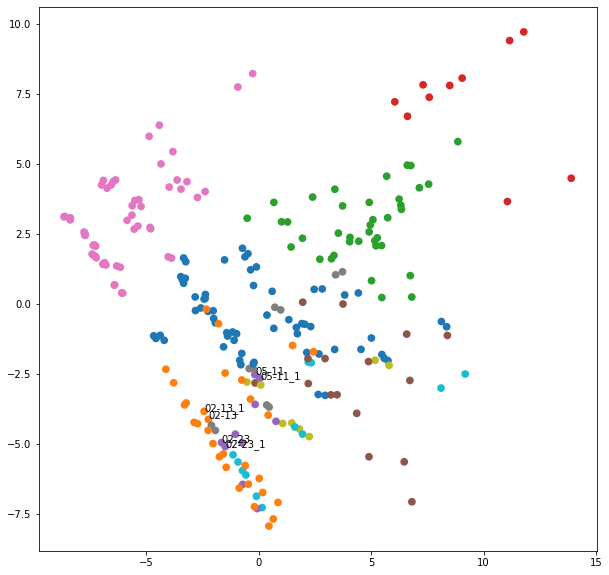

In [22]:
cha_w , cha_c = cha_freq(export=False)
pca = acp_freq(cha_w)

In [70]:
distances_1882 = pd.read_csv(os.path.join(path_to_data,"distances_1882.csv"),sep=";",index_col=0)
caption_content = "table 4: DIstance beetween the document 02-23 and other documents"
display(distances_1882.loc[["1882-02-23","1882-02-23_1","1882-05-11","1882-05-11_1","1882-07-18","1882-07-18_1","1882-02-13","1882-02-13_1"],
       ["1882-02-23"]].style.set_caption(caption_content).format("{:.4}"),metadata={"jdh":{"object":{"source": [caption_content]}}})

,1882-02-23
1882-02-23,0.0
1882-02-23_1,0.258
1882-05-11,1.798
1882-05-11_1,1.804
1882-07-18,2.384
1882-07-18_1,2.594
1882-02-13,2.968
1882-02-13_1,2.983


Contrary to what its seems in the PCA, the documents 02-23 and 02-13 are actually quite distant and 02-23 is much closer to 05-11.

#### PCA and explained variance ratio

We see in [figure X](#figure-X) the cummulative explained variance ration. Our first two components explain only a fraction of the overall informations. PCA seems not enough

TO-DO  : intêret de rajouter le explained variance ratio ?

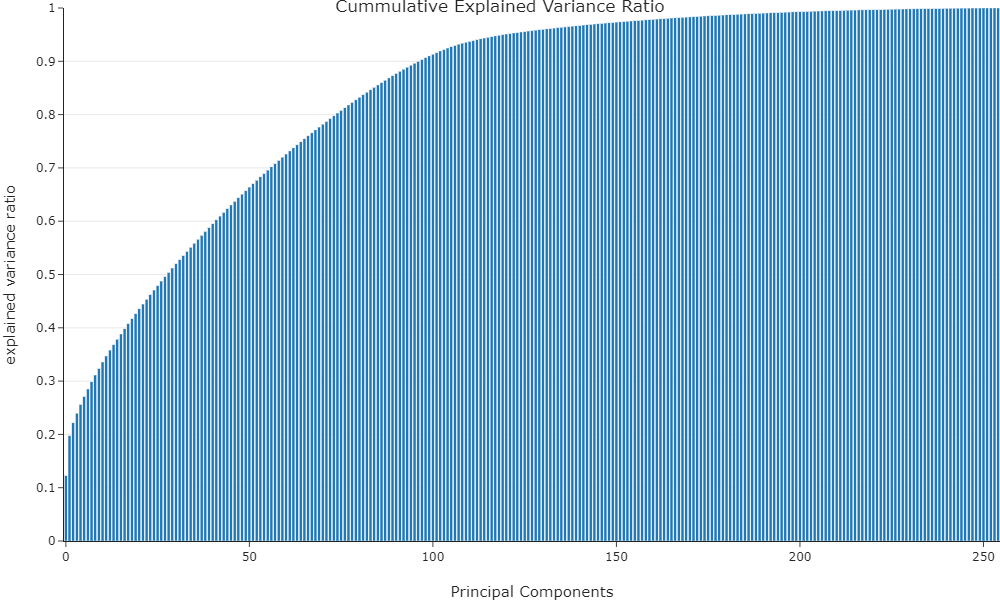

None

In [26]:
x = [i for i in range(len(pca.explained_variance_ratio_))]
y = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure([go.Bar(x=x, y=y)])
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))

fig.update_layout(go.Layout(autosize=False,width=1000,height=600),
    title={
        'text': "Cummulative Explained Variance Ratio",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
        ,template="simple_white",
    legend=dict(yanchor="top",y=1,xanchor="left",x=1,traceorder="reversed"),
    legend_title_text='p-value=') 


fig.update_xaxes(title_text = "Principal Components",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_yaxes(range=[0,1],dtick=0.1,tick0=0,title_text = "explained variance ratio",
        title_font = {"size": 15},
        title_standoff = 25,
        showgrid=True)

fig.write_image(r"media\pca_explained_variance_ration.png")
caption_content = "Figure X: First two components of the PCA on the 1882's documents"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})

### Non Linear methods

A Self-Organizing Map (SOM) is a non-linear and stochastic projection
of the data space on a low-dimension (usually 2-D) grid [REF]. The SOM
algorithm is an iterative algorithm, which takes as input a dataset and computes units (the cells of the grid) which define the map. The grid is at first
dispatched randomly in the dataspace ; then a sequence of steps is computed.
At every step, one data is chosen at random and attributed to the closest
cell, which is moved in the dataspace in order to have the data in the center
of the cell. Neighboring cells are also moved in that direction, though along
only a fraction of the distance. One could think to the grid as if it was drawn
on a piece of fabric twisted by pushing a finger on some point. We know
that self-organization is reached at the end of the algorithm, which implies
that close data in the input space have to belong to the same class or to
neighboring classes, that is to say that they are projected on the same cells
or on neighboring cells on the map (see Figure 6 for an example).

Notice that the reciprocal is not true : as any dimension reduction method, a SOM can produce fake similarity.[TODO mentionner alternatives,
comme gaz] In order to tackle this problem, we can introduce additional visualisation elements. First one is the distance between cells, as it is displayed
on Figure 6. The distance between a cell and its neighbors is highlighted by
the gray scale : the darker, the further. Another efficient tool is clustering,
also called unsupervised classification.

In [6]:
import minisom
def som_freq(cha: AgglomerativeClustering):
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    features: List[str] = [date[5:] for date in matx_occurrences.index]
    print("calcul SOM")
    n_neurons: int = 14
    m_neurons: int = 14
    som: minisom.MiniSom = minisom.MiniSom(n_neurons, m_neurons, proximity.shape[1], sigma=5, learning_rate=.5,
                                           neighborhood_function='gaussian')
    som.pca_weights_init(proximity)
    som.train(proximity, 2000, verbose=True)
    
    distances_map = som.distance_map()
    #print(distances_map)
    cases: Dict[Tuple[int, int], List[int]] = {(xn, yn): list() for xn in range(n_neurons) for yn in range(m_neurons)}
    for num_data, xx in enumerate(proximity):
        cases[som.winner(xx)].append(num_data)
    #print(cases)
    plt.figure(figsize=(14, 14))
    plt.xlim(0, n_neurons)
    plt.ylim(0, m_neurons)
    plt.yticks([])
    plt.xticks([])
    cmap = cm.get_cmap('tab10')
    for case in cases:
        plt.scatter(x=case[0] + 0.5, y=case[1] + 0.5, marker="s", s=2600, c=str(distances_map[case]))
        if len(cases[case]) > 0:
            for axe, t in enumerate(cases[case]):
                plt.annotate(xy=(case[0] + .15, case[1] + .8 - axe / 5), s=features[t], fontsize="small",
                             color="black" if distances_map[case] > 0.5 else "white", fontweight="heavy")
    #plt.savefig(os.path.join(path_data, "som_freq.png"))
    plt.close()
    caption_content = "Figure X: PLACE HOLDER"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

**Je n'arrive pas à importer ton modèle SOM que tu avais sauvegardé, ça me donne une erreur**

In [11]:
with open(os.path.join(path_to_data, "SOM_freq_clusters.p"), 'rb') as infile:
        som: minisom.MiniSom = pickle.load(infile)

AttributeError: 'MiniSom' object has no attribute '_euclidean_distance'

calcul SOM
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.024802839308320834
 topographic error: 0.047058823529411764


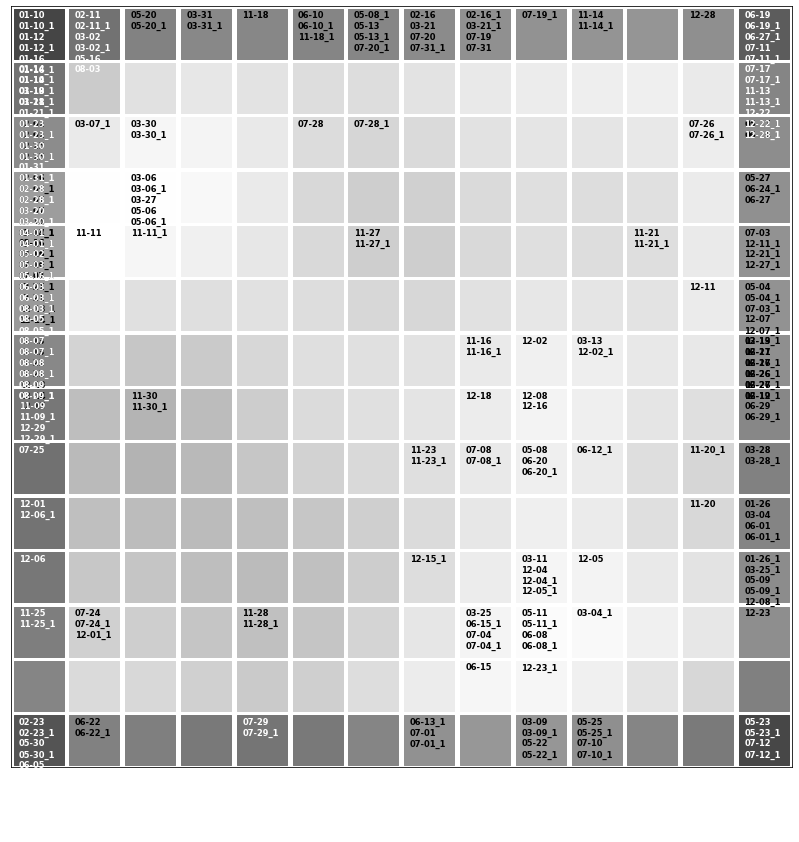

In [8]:
som_freq(cha_w)

#### SOM sur le corpus 1880-1899 (corpus avec les blocs)  
partie brouillonne avec des essais

In [14]:
word_frequency = pd.read_csv(os.path.join(path_to_big_data, "word_frequency_80.csv"), sep=";", encoding="utf-8")
blocs_name = []
for i , fichier in enumerate(os.listdir(os.path.join(path_to_data,"blocs"))) :
    blocs_name.append(fichier.split(".")[0])
    
word_frequency.index = blocs_name

In [38]:
dft = word_frequency.sample(frac=0.02, random_state=1).T
dft.loc[:, "total"] = dft.sum(axis=1)
dft = dft.sort_values(by="total", ascending=False)
dft = dft.loc[dft.total > 50, :].drop("total", axis=1).fillna(0)
dft = dft.transpose()
proximity = MinMaxScaler().fit_transform(dft)
features: List[str] = [date for date in dft.index]
print("calcul SOM")
n_neurons: int = 14
m_neurons: int = 14

calcul SOM


In [40]:
from minisom import MiniSom    
som = MiniSom(n_neurons, m_neurons, proximity.shape[1], sigma=5, learning_rate=0.5) # initialization of 6x6 SOM
#som.pca_weights_init(proximity)
som.train(proximity, 2000,verbose=True)

 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.010600857249103384
 topographic error: 0.08217270194986072


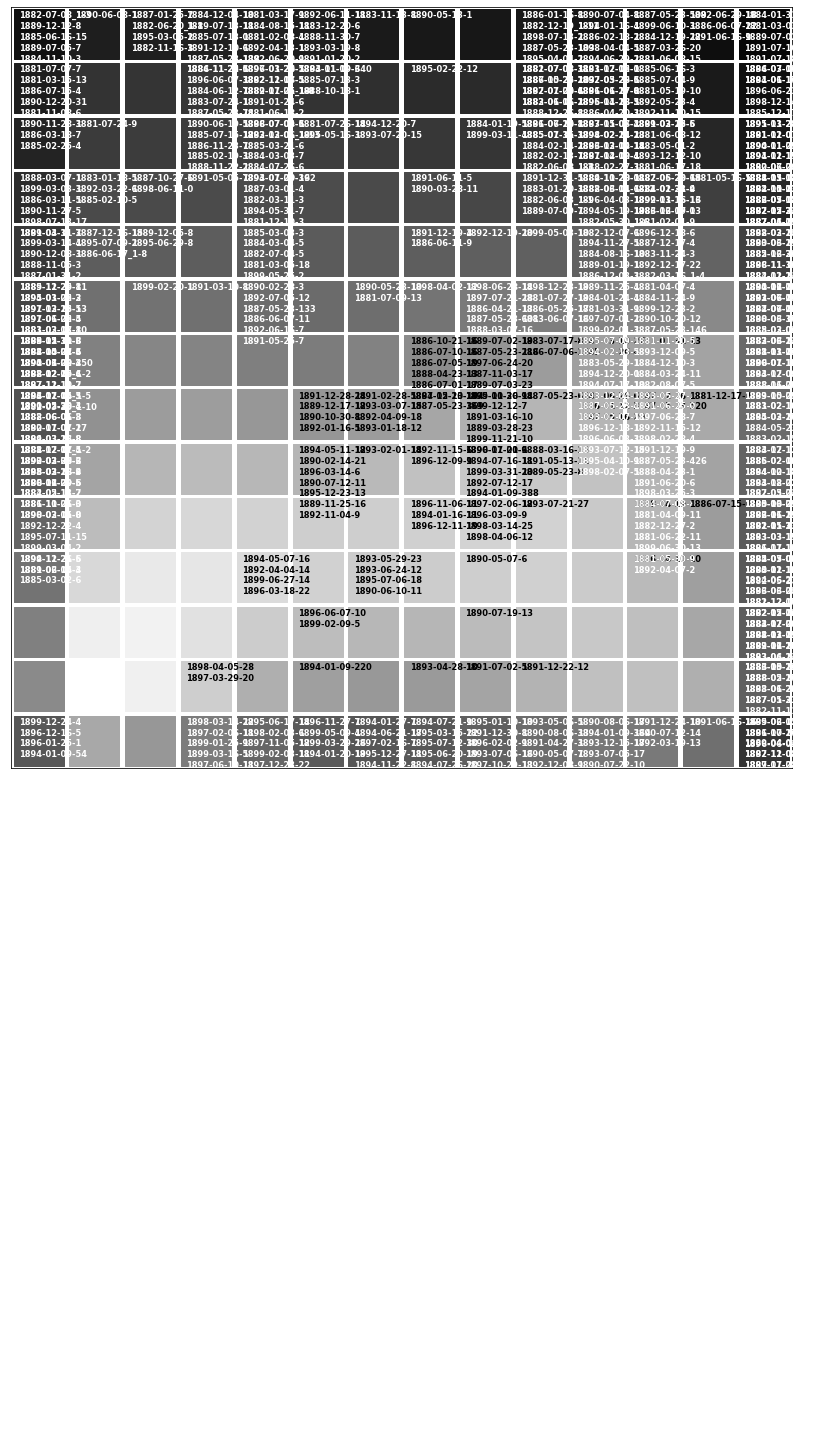

In [45]:
distances_map = som.distance_map()
#print(distances_map)
cases: Dict[Tuple[int, int], List[int]] = {(xn, yn): list() for xn in range(n_neurons) for yn in range(m_neurons)}
for num_data, xx in enumerate(proximity):
    cases[som.winner(xx)].append(num_data)
#print(cases)
plt.figure(figsize=(14, 14))
plt.xlim(0, n_neurons)
plt.ylim(0, m_neurons)
plt.yticks([])
plt.xticks([])
cmap = cm.get_cmap('tab10')
for case in cases:
    plt.scatter(x=case[0] + 0.5, y=case[1] + 0.5, marker="s", s=2600, c=str(distances_map[case]))
    if len(cases[case]) > 0:
        for axe, t in enumerate(cases[case]):
            plt.annotate(xy=(case[0] + .15, case[1] + .8 - axe / 5), s=features[t], fontsize="small",
                         color="black" if distances_map[case] > 0.5 else "white", fontweight="heavy")

### Clustering as a tool for visualization

The aim of a clustering is to divide a dataset in clusters of vertices that
are close to each other, according to some metrics. A clustering can be illustrated by a choice of colors, shapes or markers, each coding for a different
class. The borders of these classes are not only providing additional information to the graph, but can also help spotting problems. For instance, the
colors in Figure 5 represents the different classes from an Agglomerative
Clustering with 8 components. The orange, violet and lightblue dots seem
very intricated, while they are in reality pretty well divided apart
. Similar
information could be added on the Self-Organizing map in Figure 6.


In [24]:
def clustering_acp(year = 1882) : 
    year = 1882
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_annees", f"comptage_{year}.csv"),
                                                 sep=";", encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    distances = np.vectorize(lambda x: 1 - x)(proximity)

    cha : AgglomerativeClustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
    cha.fit(proximity)
    cha_colors = ["orange" if l == 0 else "green" for l in cha.labels_]

    km : KMeans = KMeans(n_clusters=2,random_state=1)
    km.fit(proximity)
    km_colors = ["orange" if l == 0 else "green" for l in km.labels_]
    
    pca = PCA()
    XP = pca.fit_transform(proximity)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
    ax1.scatter(XP[:, 0], XP[:, 1], edgecolors="none", marker="o", cmap="tab10", s=60, c=cha_colors)
    ax2.scatter(XP[:, 0], XP[:, 1], edgecolors="none", marker="o", cmap="tab10", s=60, c=km_colors)
    ax1.title.set_text("figure 4a: Agglomerative Clustering")
    ax2.title.set_text("figure 4b: K-Means")
    plt.savefig(r"media\clustering_1882.png")
    plt.close()
    caption_content = "Figure X: Clustering of the 1882 texts into two classes according to different algorithms"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

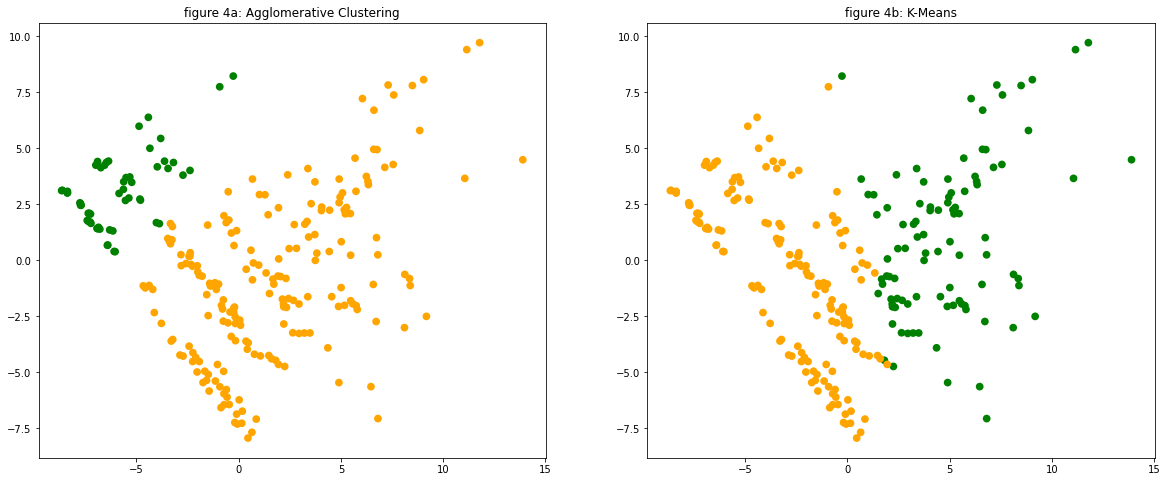

In [25]:
clustering_acp(1882)

### Assessing the quality of a clustering

There exist dozens of methods to perform such a clustering, and deciding
which one better suits a given dataset can be uneasy. First, notice that we
are dependent on the variables that we have used to build the corpus in the first place, since the quality of a clustering is always according to some
measurement. For instance, here even the best clustering tool would fail at
classifying all texts about colonial affairs in a single cluster, for the problems
lie in the decision to use word frequencies as initial variables. We will deal
with that problem in the next chapter ; for now let us focus on building a
good clustering according to a given set of variables.

It is important to keep in mind that different algorithms will fit different
kinds of data shapes (see Figure 7). For instance, agglomerative clustering,
since it works by merging the closest clusters one pair at a time will be
sensitive to big gaps in the data ; thus the clusters will usually have neat
borders but possibly strange shapes and inbalanced sizes. On the other hand,
k-Means works with geometric shapes (Voronoï diagrams) ; hence the clusters
tend to have more regular shapes but fuzzier borders.


When it comes to clustering, the main thing we are looking for is dividing
the space into coherent clusters. That means, they should be far apart from
each other, which states that the division was necessary ; in addition the
distances inside one cluster should remain as small as possible, so that no
more subdivision should be required. Thus we can define objective functions
that keep that under control. On Figure 8 we see (for two different measures)
the increase in the function every time we merge two clusters into a single
one. In the beginning, increases are pretty moderate, indicating that further
clustering is required. At some point there is a sound inflexion, which is the
sign that past that limit clusters are too far away from each other to be
combined without a big loss of information.

In [31]:
def optimal_cluster(cha : AgglomerativeClustering, cha2 : AgglomerativeClustering):
    n_clusters_w = cha.n_clusters
    n_clusters_c = cha2.n_clusters    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(range(len(cha2.distances_)), cha.distances_, label="complete linkage")
    plt.plot(range(len(cha2.distances_)), cha2.distances_, label="Ward linkage")
    ymax: float = min(60, max([cha2.distances_[-1], cha.distances_[-1]]))
    plt.annotate(text=f"{n_clusters_w} classes", xy=(len(cha.distances_) - n_clusters_w - 25, 2))
    plt.vlines(len(cha.distances_) - n_clusters_w, 0, ymax, linestyles="dashed", color="orange", linewidth=2)
    plt.annotate(text=f"{n_clusters_c} classes", xy=(len(cha.distances_) - n_clusters_c + 1, 2))
    plt.vlines(len(cha.distances_) - n_clusters_c, 0, ymax, linestyles="dashed", color="blue", linewidth=2)
    plt.ylim(0, ymax)
    plt.grid()
    plt.legend()
    plt.xlabel("number of steps")
    plt.savefig(r"media\clustering_loss_function.png")
    plt.close()
    caption_content = "Figure 8: Choice of a number of classes according to some objective function (Ward or complete). Y-axis stands for the value of the objective function ; when it rises significantly (the vertical bars stand at the inflection points), it means that further clustering would lead to much less coherent clusters."
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

**UPDATE** : pour la fonction annotate de matplotlib, il semble que il y a eu une mise à joute : la paramètre qui permettait l'annotation n'est plus "s=" mais "text=

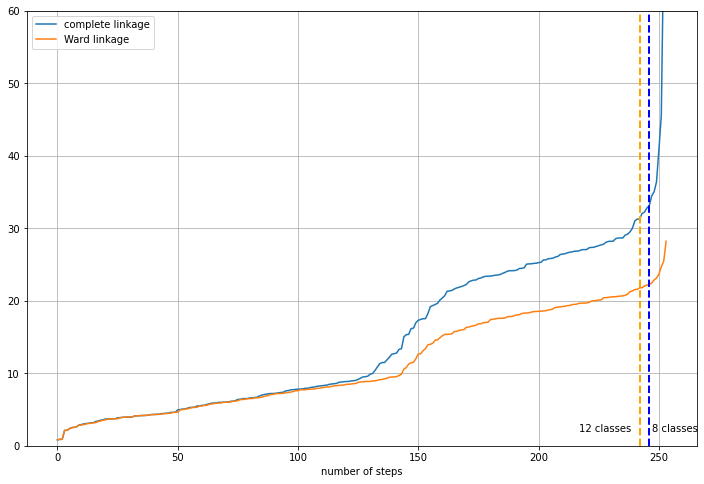

In [32]:
optimal_cluster(cha_w,cha_c)

In [33]:
def elbow_method() : 
    year = 1882
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_annees", f"comptage_{year}.csv"),
                                                 sep=";", encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)

    metrics = []
    for k in range(1,20) : 
        km : KMeans = KMeans(n_clusters=k,random_state=1)
        km.fit(proximity)
        metrics.append(km.inertia_)
    fig = plt.figure(figsize=(12, 8))
    plt.plot(range(1,20), metrics, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig(r"media\elbow_method.png")
    plt.close()
    caption_content = "figure X : Elbow method For Optimal k"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

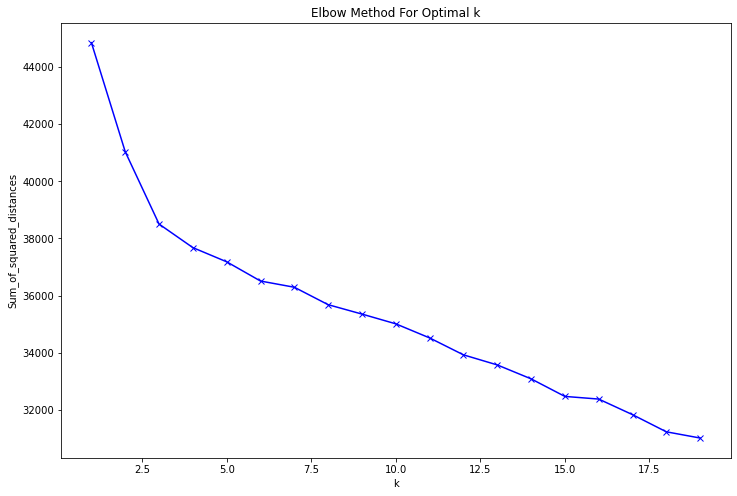

In [34]:
elbow_method()

## Alternative lexicometry tools : coocurrences, topics, embedding

### Topic Modelling

Topic generation model through Latent Dirichlet Allocation (LDA) has
been introduced for the first time in 2003 by [REF]. It is based on a bayesian
probabilist model, which stems from the following theoretical hypothesis. Before any article is written there exist topics, this word standing for semantic
fields, i. e. sets of words that are connected by their meaning. Then the texts
are produced by picking words among a small subset of topics with a given
probability law. In practice, that means that the texts are the observations
who derive from hidden variables, namely the topics, and that statistical
correlations in the texts are the direct results of semantic similarities. Thus
we expect to find the topics through reverting the generation process. In
other words, we want to know the topics as distributions of words and the
texts as distributions of topics, conditionally to the observed distribution of
words. Unfortunately, computing the universe probability is not tractable so
we need to approximate this quantity. Many algorithms have been introduced in litterature to handle this ; here we simply use the original one from
Blei and al, namely Mean Field variational method (2003).  

Let us run a topic model on the whole corpus, with 100 topics. We end up
with a lot of topic of great coherence among those, as we can see in Table 9.   
Now, the process can been improved in some ways. For instance, there
might be several topics that actually deal with the same subjects. Hence
we can compute a clustering of topics, in order to merge together those
with high proximity, and thus end up with a smaller set of topics, easier to analyze. Since the number of topics is much smaller than the number of
words in the vocabulary, the clustering process is easier to visualize as well
(See Figure 10a)


In [37]:
path_to_model = os.path.join(path_to_data, "model_ML")

def load_model(model_file):
    word_frequency = pd.read_csv(os.path.join(path_to_big_data, "word_frequency_80.csv"), sep=";", encoding="utf-8",
                                 index_col=0)

    clefs: List[str] = list(word_frequency.columns)

    blocs: List[str] = list(word_frequency.index)

    pkl_filename = os.path.join(path_to_model, model_file)
    with open(pkl_filename, 'rb') as file:
        lda = pickle.load(file)

    nb_topics: int = lda.n_components
    words_per_topic: int = 20

    topic_to_text = lda.transform(word_frequency.values)

    topics: pd.DataFrame = pd.DataFrame({f"Topic{i}": [clefs[w] for w in top.argsort()[-words_per_topic:]]
                                         for i, top in enumerate(lda.components_)})

    table_topics_to_texts: pd.DataFrame = pd.DataFrame(np.vectorize(lambda z: f"{z:.3f}")(topic_to_text),
                                                       columns=range(nb_topics), index=blocs)
    #topics.to_excel(os.path.join(path_data, "topics.xlsx"), encoding="utf-8", index=False)
    #table_topics_to_texts.to_excel(os.path.join(path_data, "corpus_topics.xlsx"), encoding="utf-8", index=True)

    return topic_to_text, topics, table_topics_to_texts

text_topics, topics, table_text_topics = load_model("lda_model_blocs.pkl")

In [38]:
caption_content = "table X: All topics and words"
display(topics.T.iloc[:,-1:-10:-1].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

,19,18,17,16,15,14,13,12,11
Topic0,baron,tabac,duc,lot,soubeyran,rochefoucauld,dufour,bisaccia,raoul
Topic1,gauche,loi,monsieur,droit,applaudissement,politique,pays,liberté,grand
Topic2,fr,droit,tarif,prix,blé,produit,industrie,douane,france
Topic3,re,monsieur,dit,co,faire,el,ii,ment,an
Topic4,droit,commerce,fr,loi,impôt,propriété,grand,propriétaire,faire
Topic5,comte,baron,jules,georges,seine,paul,albert,martin,louis
Topic6,gauche,monsieur,président,ministre,applaudissement,faire,chambre,dit,gouvernement
Topic7,travail,ouvrier,heure,enfant,femme,industrie,ouvrière,usine,atelier
Topic8,ouvrier,compagnie,loi,mine,mineur,faire,grève,ministre,travaux
Topic9,article,loi,art,adopté,fr,chambre,président,voix,er


In [39]:
dft = pd.DataFrame(topics.values[20:9:-1,[24,25,32]],columns=[24,25,32],index = ["word"+str(i+1) for i in range(10)])
caption_content = "table 245: Three topics detected by the algorithm, one about school, one about alcohol and the last one about navy"
display(dft.style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

,24,25,32
word1,école,vin,marine
word2,enseignement,alcool,port
word3,instruction,droit,navire
word4,instituteur,boisson,ministre
word5,publique,faire,service
word6,ministre,loi,faire
word7,élève,hectolitre,maritime
word8,primaire,monsieur,monsieur
word9,loi,fraude,construction
word10,monsieur,octroi,grand


In [47]:
def topics_cha() : 
    topic_sets: List[str] = list(topics.columns)
    nb_topics: int = len(topic_sets)
    proximity: np.ndarray = np.array([
        [len(set(topics.loc[:, f"Topic{nt1}"].to_list()) & set(topics.loc[:, f"Topic{nt2}"].to_list()))
         for nt1 in range(nb_topics)] for nt2 in range(nb_topics)])

    words_in_topic: int = 20
    distance_max: int = 9
    distances: np.ndarray = np.vectorize(lambda x: words_in_topic - x)(proximity)

    cha = AgglomerativeClustering(affinity="precomputed", linkage="complete",
                                  distance_threshold=distance_max, n_clusters=None)

    from scipy.cluster.hierarchy import dendrogram
    cha.fit(distances)
    #print(cha.labels_)
    fig = plt.figure(figsize=(10, 8), dpi=300)
    counts = np.zeros(cha.children_.shape[0])
    n_samples = len(cha.labels_)
    for i, merge in enumerate(cha.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([cha.children_, cha.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, color_threshold=distance_max)
    plt.savefig(r"media\dendogram_cha.png")
    plt.close()
    caption_content = "figure X: Dendogram for Agglomerative Clustering"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

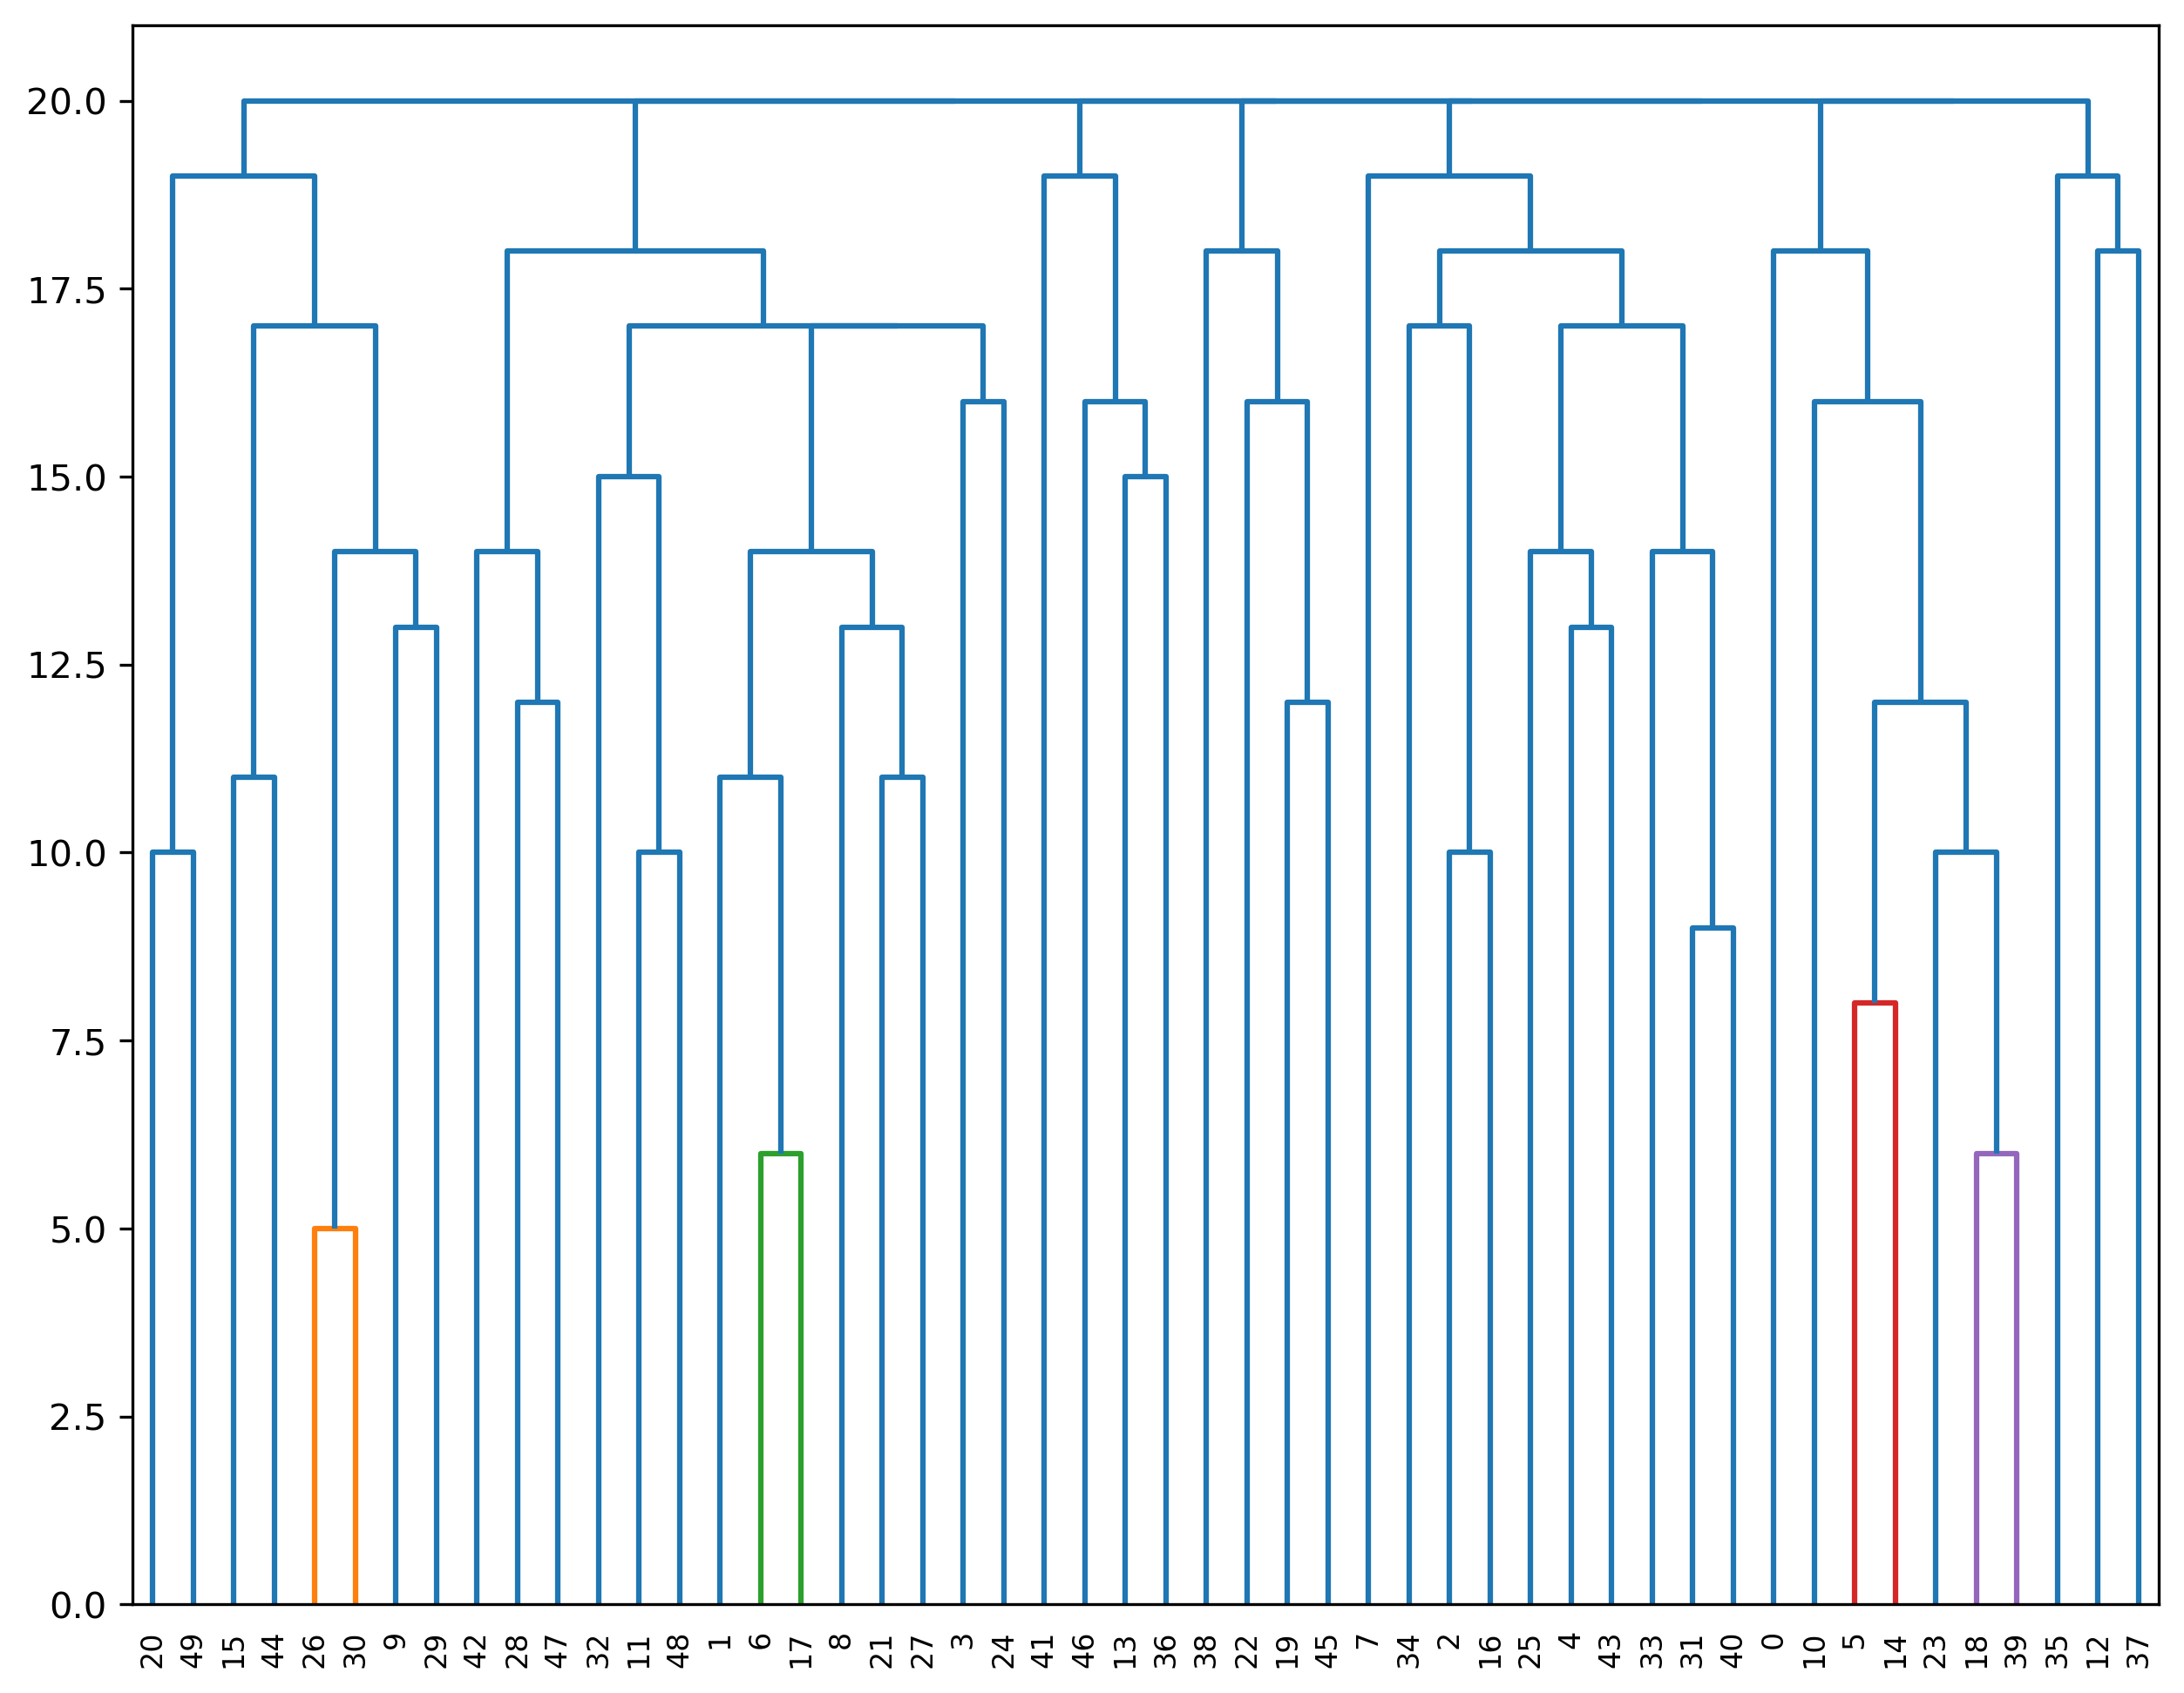

In [48]:
topics_cha()

Part of the dendogram of the classification of topics, according to the objective
function in the Y-axis (here the distance is equal to the number of different words
in two topics). This visualization not only shows when it is necessary to stop the
clustering process, as in Figure 8, but also which topics have been merged at every
step.

In [50]:
caption_content = "table X: Details of two topics (in green) that are merged at an early stage of the algorithm. They both deal with XXXXXXXXX and have 14 words in common"
display(topics.iloc[-1:-11:-1,[6,17]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

,Topic6,Topic17
19,gauche,président
18,monsieur,gauche
17,président,monsieur
16,ministre,chambre
15,applaudissement,question
14,faire,gouvernement
13,chambre,faire
12,dit,ministre
11,gouvernement,banc
10,banc,conseil


In [71]:
topics.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic0,mesnildot,sort,saint,colonel,tirage,martin,clercq,duval,culture,plazanet,comte,raoul,bisaccia,dufour,rochefoucauld,soubeyran,lot,duc,tabac,baron
Topic1,chambre,pouvoir,dit,faut,gouvernement,homme,question,banc,république,républicain,faire,grand,liberté,pays,politique,applaudissement,droit,monsieur,loi,gauche
Topic2,marché,pays,faire,grand,monsieur,million,agriculture,français,chiffre,commerce,étranger,france,douane,industrie,produit,blé,prix,tarif,droit,fr
Topic3,pr,er,dé,ministre,in,li,pa,tion,nt,it,ie,an,ment,ii,el,faire,co,dit,monsieur,re
Topic4,patente,maison,intérêt,revenu,marchandise,valeur,payer,projet,taxe,vente,petit,faire,propriétaire,grand,propriété,impôt,loi,fr,commerce,droit
Topic5,indre,edmond,alfred,arthur,pierre,hippolyte,saint,ferry,henri,marne,léon,louis,martin,albert,paul,seine,georges,jules,baron,comte
Topic6,tribune,question,sceau,journal,extrême,garde,jour,fait,conseil,centre,banc,gouvernement,dit,chambre,faire,applaudissement,ministre,président,monsieur,gauche
Topic7,manufacture,travailler,nuit,travailleur,établissement,loi,salaire,industriel,jour,patron,journée,atelier,usine,ouvrière,industrie,femme,enfant,heure,ouvrier,travail
Topic8,salaire,question,gouvernement,jour,patron,chambre,droit,syndicat,délégué,monsieur,travail,travaux,ministre,grève,faire,mineur,mine,loi,compagnie,ouvrier
Topic9,département,demande,discussion,somme,projet,mis,etat,ministre,présente,intérêt,caisse,er,voix,président,chambre,fr,adopté,art,loi,article


In [70]:
classes = {
    "names of MP": [0, 5, 10, 14, 18, 23, 35, 37, 39],
    "government/parliament": [1, 6, 9, 13, 17, 19, 22, 36, 38, 41, 45, 46, 49],
    "economy": [2, 4, 16],
    "working class": [7, 8, 31, 34],
    "army": [11, 48],
    "department": [12],
    "trains/communications": [15, 44],
    "local politics": [20, 33],
    "law inforcement": [21, 40],
    "school": [24],
    "alcohol": [25],
    "budget": [26, 29, 30, 43],
    "colonies": [28],
    "navy": [32],
    "building works": [27, 42],
    "foreign affairs": [47],
    "junk": [3]
}

### Assessing the quality of the model

### Top2Vec ?

## Evolution with time